# NARMA Sequence generator functions

In [6]:
# Libraries importation

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations

In [7]:
# Input generator

# a, b, g: input parameters
# ct: number of timesteps
def u_generator(a, b, g, ct):
    u = [] # input vector
    # loop between 1 and ct
    for t in range(1, ct):
        b1 = np.sin((2*np.pi*a*t)/ct) # first term
        b2 = np.sin((2*np.pi*b*t)/ct) # second term
        b3 = np.sin((2*np.pi*g*t)/ct) # third term
        u.append(0.1 * ((b1 * b2 * b3) + 1)) # append formula result to u
    return u # return input vector

In [8]:
# input generation
u = u_generator(2.11, 3.73, 4.11, 100)

Text(0.5, 1.0, 'input sequence')

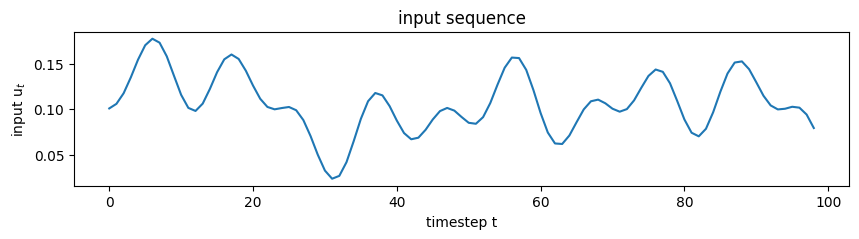

In [9]:
# set figure size to match the one in the paper
plt.figure(figsize=(10, 2))
# plot input
plt.plot(u)
# legend axis x
plt.xlabel('timestep t')
# legend axis y
plt.ylabel('input u$_t$')
# title
plt.title('input sequence')

In [10]:
# NARMA output generator

# a, b, g: input parameters
# d: initial value
# n: delay
# u: input vector
def y_generator(a, b, g, d, n, u):
    y = [d] # output vector
    # loop between 1 and the length of u
    for i in range(1, len(u)):
        n_temp = 0 # temporary variable
        # if the length of y is less than n + 1
        if len(y) < n + 1:
            n_temp = len(y) # set n_temp to the length of y
            s = 0 # temporary variable
            # loop between 0 and the length of y minus 1
            for j in range(n_temp - 1):
                s += y[i - j - 1] # sum of y
        else:
            s = 0 # temporary variable
            # loop between 0 and n - 1
            for j in range(n - 1):
                s += y[i - j - 1] # sum of y
        b1 = a * y[i - 1] # first term
        b2 = b * y[i - 1] * s # second term
        # if the length of y is less than n + 1
        if len(y) < n - 1:
            n_temp = len(y) # set n_temp to the length of y
            b3 = g * u[i - 1 - n_temp + 1] * u[i - 1] # third term
        else:
            b3 = g * u[i - n + 1] * u[i-1] # third term
        y.append(b1 + b2 + b3 + d) # append formula result to y
    return y # return output vector


Text(0.5, 1.0, 'target sequence for NARMA-2')

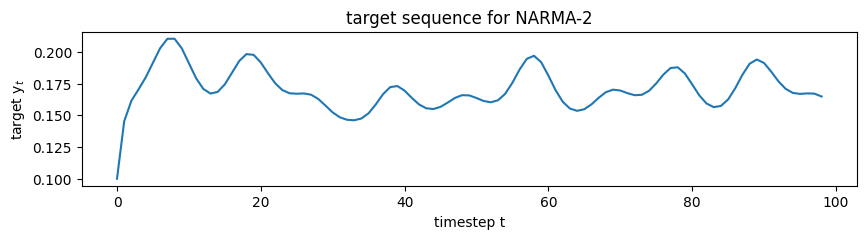

In [11]:
# output generation
y = y_generator(0.3, 0.05, 1.5, 0.1, 2, u)
# set figure size to match the one in the paper
plt.figure(figsize=(10, 2))
# plot output
plt.plot(y)
# legend axis x
plt.xlabel('timestep t')
# legend axis y
plt.ylabel('target y$_t$')
# title
plt.title('target sequence for NARMA-2')

Text(0.5, 1.0, 'target sequence for NARMA-5')

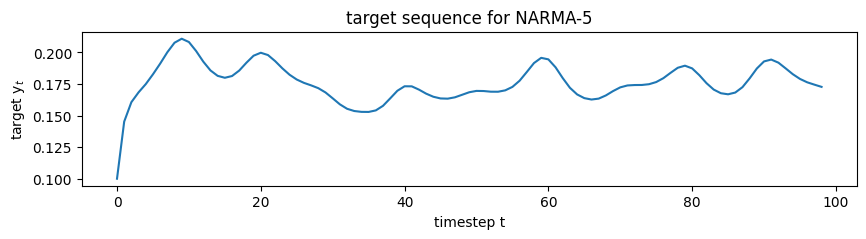

In [12]:
# output generation
y = y_generator(0.3, 0.05, 1.5, 0.1, 5, u)
# set figure size to match the one in the paper
plt.figure(figsize=(10, 2))
# plot output
plt.plot(y)
# legend axis x
plt.xlabel('timestep t')
# legend axis y
plt.ylabel('target y$_t$')
# title
plt.title('target sequence for NARMA-5')

Text(0.5, 1.0, 'target sequence for NARMA-10')

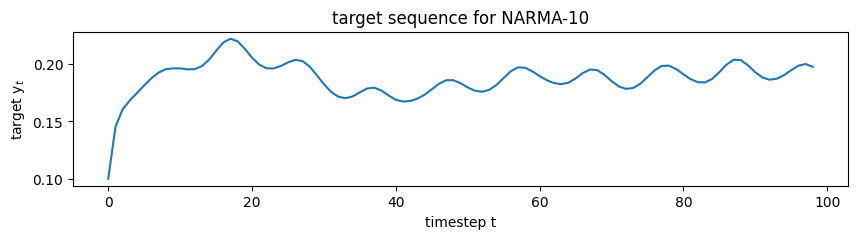

In [13]:
# output generation
y = y_generator(0.3, 0.05, 1.5, 0.1, 10, u)
# set figure size to match the one in the paper
plt.figure(figsize=(10, 2))
# plot output
plt.plot(y)
# legend axis x
plt.xlabel('timestep t')
# legend axis y
plt.ylabel('target y$_t$')
# title
plt.title('target sequence for NARMA-10')